In [1]:
#Геометрические преобразования изображений

C:\ProgramData\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


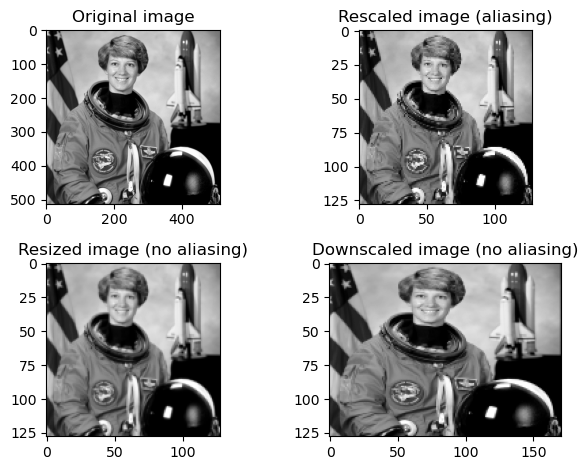

In [2]:
import matplotlib.pyplot as plt

from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean

image = color.rgb2gray(data.astronaut())

image_rescaled = rescale(image, 0.25, anti_aliasing=False)
image_resized = resize(image, (image.shape[0] // 4, image.shape[1] // 4),
                       anti_aliasing=True)
image_downscaled = downscale_local_mean(image, (4, 3))

fig, axes = plt.subplots(nrows=2, ncols=2)

ax = axes.ravel()

ax[0].imshow(image, cmap='gray')
ax[0].set_title("Original image")

ax[1].imshow(image_rescaled, cmap='gray')
ax[1].set_title("Rescaled image (aliasing)")

ax[2].imshow(image_resized, cmap='gray')
ax[2].set_title("Resized image (no aliasing)")

ax[3].imshow(image_downscaled, cmap='gray')
ax[3].set_title("Downscaled image (no aliasing)")

ax[0].set_xlim(0, 512)
ax[0].set_ylim(512, 0)
plt.tight_layout()
plt.show()

In [3]:
#Проективные преобразования (гомографии)

In [4]:
from skimage import data
from skimage import transform, io
from skimage import img_as_float
import numpy as np

tform = transform.EuclideanTransform(
   rotation=np.pi / 12.,
   translation = (100, -20)
   )

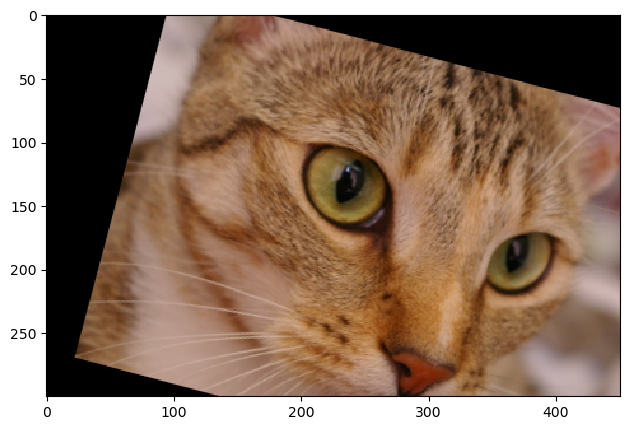

In [5]:
img = img_as_float(data.chelsea())
tf_img = transform.warp(img, tform.inverse)
io.imshow(tf_img)

In [6]:
text = data.text()

src = np.array([[0, 0], [0, 50], [300, 50], [300, 0]])
dst = np.array([[155, 15], [65, 40], [260, 130], [360, 95]])

tform3 = transform.ProjectiveTransform()
tform3.estimate(src, dst)
warped = transform.warp(text, tform3, output_shape=(50, 300))

In [7]:
#Функция оценки skimage.transform.estimate().

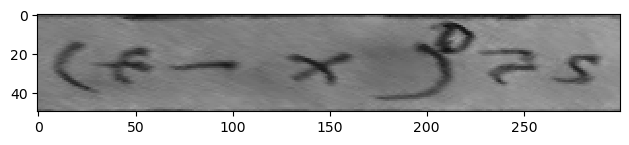

In [8]:
io.imshow(warped)